**Dataset Discription**

Sentiment140 is a popular dataset for sentiment analysis that consists of 1.6 million tweets. The tweets were collected in February 2009, during which time Twitter was still a relatively new platform. The dataset was created by Stanford University researchers as a benchmark for evaluating sentiment analysis algorithms. Each tweet in the dataset is labeled with a sentiment score of either positive, negative, or neutral. The sentiment scores were assigned based on the presence of emoticons in the tweet. If a tweet contained a positive emoticon (e.g., :) or <3), it was labeled as positive. If it contained a negative emoticon (e.g., :( or </3), it was labeled as negative. Tweets without any emoticons were labeled as neutral. Sentiment140 has become a widely used dataset in the field of natural language processing and sentiment analysis. It has been used for tasks such as sentiment classification, opinion mining, and emotion detection. However, it is worth noting that the dataset is now over a decade old and may not be representative of current sentiment on Twitter.

In [4]:
#importing libraries
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Reading Dataset**

In [6]:
import csv
filepath = '/content/gdrive/MyDrive/training.1600000.processed.noemoticon.csv'
column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']

rows = []

with open(filepath, encoding='ISO-8859-1') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        rows.append(row)

df = pd.DataFrame(rows, columns=column_names)
# Shuffle DataFrame rows and reset index
df = df.sample(frac=1).reset_index(drop=True)


In [7]:
len(df)

1600000

In [8]:
#Selecting only 10000 rows
df=df[:10000]

**Exploratory Data Analysis**

In [9]:
# Print the first five rows of the dataframe to verify that the data was loaded correctly
print(df.head())

  target         ids                          date      flag            user  \
0      4  1965561551  Fri May 29 16:08:17 PDT 2009  NO_QUERY          xzenax   
1      4  1932885773  Tue May 26 22:27:12 PDT 2009  NO_QUERY          shabuz   
2      0  2228138471  Thu Jun 18 14:04:02 PDT 2009  NO_QUERY  PrincessSakura   
3      4  1993879805  Mon Jun 01 11:04:22 PDT 2009  NO_QUERY     rockyduuude   
4      0  2245906459  Fri Jun 19 16:48:44 PDT 2009  NO_QUERY         Janesaw   

                                                text  
0  &quot;Off the hizzle fo' shizzle&quot; ;) phra...  
1  @shouman ok, let's stop this here.. time will ...  
2  wish i was america so could meen nicolous brau...  
3  coincidence that the @katyperry gig was postpo...  
4  Why does raisin toast burn so much faster than...  


In [10]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [11]:
print('length of data is', len(df))

length of data is 10000


In [12]:
df. shape

(10000, 6)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  10000 non-null  object
 1   ids     10000 non-null  object
 2   date    10000 non-null  object
 3   flag    10000 non-null  object
 4   user    10000 non-null  object
 5   text    10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


In [14]:
df.dtypes

target    object
ids       object
date      object
flag      object
user      object
text      object
dtype: object

In [15]:
df.describe()

,target,ids,date,flag,user,text
count,10000,10000,10000,10000,10000,10000
unique,2,10000,9921,1,9714,9991
top,0,1965561551,Sun Jun 14 23:56:08 PDT 2009,NO_QUERY,tsarnick,homework
freq,5036,1,2,10000,5,3


In [16]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [17]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   10000


In [18]:
df['target'].unique()

array(['4', '0'], dtype=object)

In [19]:
df['target'].nunique()

2

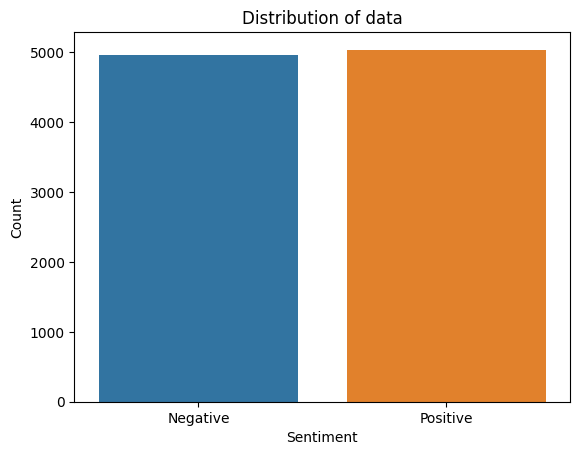

In [20]:
import seaborn as sns

# Plot distribution of target variable
sns.countplot(x='target', data=df)
sns.set_style('whitegrid')
plt.title('Distribution of data')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


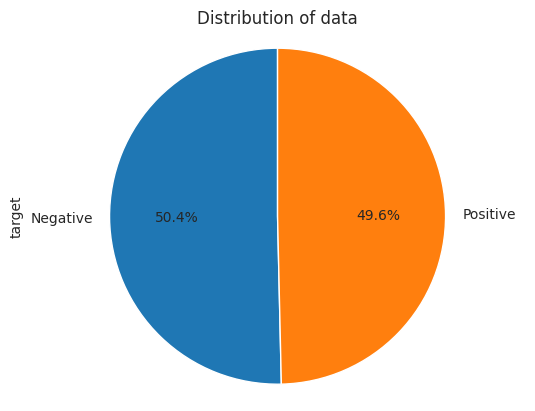

In [21]:
# Calculate the distribution of the target variable
target_counts = df['target'].value_counts()

# Create a pie chart of the target variable distribution
target_counts.plot.pie(labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of data')
plt.axis('equal')
plt.show()

In [22]:
data=df[['text','target']]

In [23]:
data['target'] = data['target'].replace(4,1)

<ipython-input-23-54c9eb4fa536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [24]:
data['target'].unique()

array(['4', '0'], dtype=object)

In [25]:
data['target'] = data['target'].replace({'4': 1, '0': 0})

<ipython-input-25-9551581071b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace({'4': 1, '0': 0})


In [26]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [27]:
dataset = pd.concat([data_pos, data_neg])

In [28]:
data['text']

0       &quot;Off the hizzle fo' shizzle&quot; ;) phra...
1       @shouman ok, let's stop this here.. time will ...
2       wish i was america so could meen nicolous brau...
3       coincidence that the @katyperry gig was postpo...
4       Why does raisin toast burn so much faster than...
                              ...                        
9995    Its official, the puppies name is gonna be nam...
9996    @CobwebsStir It's a date! However, I'm hard to...
9997    blissful afternoon with the hubby: jacuzzi, ma...
9998           @CollinEarl but it was way too much food. 
9999    yey! hersheys won well groomed! horay for hers...
Name: text, Length: 10000, dtype: object

In [29]:
data['text']=data['text'].str.lower()
data['text'].tail()

<ipython-input-29-52474beee962>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text']=data['text'].str.lower()


9995    its official, the puppies name is gonna be nam...
9996    @cobwebsstir it's a date! however, i'm hard to...
9997    blissful afternoon with the hubby: jacuzzi, ma...
9998           @collinearl but it was way too much food. 
9999    yey! hersheys won well groomed! horay for hers...
Name: text, dtype: object

**Removing Stop Words**

"Removing stop words" is a technique used in natural language processing to eliminate common words that have little semantic meaning from a text. These words, such as "the," "is," and "and," do not contribute much to the overall understanding of the text. By removing these words, the focus is shifted to more informative words, improving the quality of analysis.

In [30]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

# Download stopwords corpus if necessary
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
# Define function to remove stopwords from a string
def remove_stopwords(text):
    filtered_words = [word for word in text.split() if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply function to the 'text' column of the DataFrame
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))

print(data.head())

                                                text  target
0  &quot;off hizzle fo' shizzle&quot; ;) phrase d...       1
1  @shouman ok, let's stop here.. time say ;) pro...       1
2  wish america could meen nicolous braun, demi, ...       0
3  coincidence @katyperry gig postponed adie said...       1
4         raisin toast burn much faster normal toast       0


<ipython-input-31-4d2c6263d516>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: remove_stopwords(x))


**Removing Puctuations**


Removing punctuation from text is a common preprocessing step in natural language processing. Punctuation marks such as periods, commas, exclamation marks, and question marks do not typically carry significant meaning in textual analysis and can be safely removed to focus on the actual words and their semantic content.

In [32]:
import string
# Define a string of all punctuations
punctuations = string.punctuation

# Define function to clean and remove punctuations from a string
def clean_text(text):
    clean_text = text.translate(str.maketrans('', '', punctuations))
    return clean_text

# Apply function to the 'text' column of the DataFrame
data['text'] = data['text'].apply(lambda x: clean_text(x))

print(data.head())

                                                text  target
0       quotoff hizzle fo shizzlequot  phrase day xx       1
1  shouman ok lets stop here time say  projector ...       1
2  wish america could meen nicolous braun demi se...       0
3  coincidence katyperry gig postponed adie said ...       1
4         raisin toast burn much faster normal toast       0


<ipython-input-32-b5f4f8de8c89>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: clean_text(x))


**Remove repeating characters**

Removing repeating characters in text is another common preprocessing step that can be performed to clean and normalize text data. Repeated characters, such as consecutive letters or symbols, often do not contribute significantly to the semantic meaning of the text and can be considered noise or artifacts.

In [33]:
# Clean and remove repeating characters from a column in a Pandas DataFrame
import re

# Define function to clean and remove repeating characters from a string
def clean_text(text):
    clean_text = re.sub(r'(\w)\1+', r'\1', text)
    return clean_text

# Apply function to the 'text' column of the DataFrame
data['text'] = data['text'].apply(lambda x: clean_text(x))

print(data.head())

                                                text  target
0           quotof hizle fo shizlequot  phrase day x       1
1  shouman ok lets stop here time say  projector ...       1
2  wish america could men nicolous braun demi sel...       0
3  coincidence katypery gig postponed adie said s...       1
4         raisin toast burn much faster normal toast       0


<ipython-input-33-41e0fc5fb32b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: clean_text(x))


**Remove URLs**

In [34]:
# Define function to clean and remove URLs from a string
def clean_text(text):
    clean_text = re.sub(r'http\S+', '', text)
    return clean_text

# Apply function to the 'text' column of the DataFrame
data['text'] = data['text'].apply(lambda x: clean_text(x))

print(data.head())

                                                text  target
0           quotof hizle fo shizlequot  phrase day x       1
1  shouman ok lets stop here time say  projector ...       1
2  wish america could men nicolous braun demi sel...       0
3  coincidence katypery gig postponed adie said s...       1
4         raisin toast burn much faster normal toast       0


<ipython-input-34-9b87d4588d8d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: clean_text(x))


**Remove numeric numbers**

In [35]:
# Define function to clean and remove numeric numbers from a string
def clean_text(text):
    clean_text = re.sub(r'\d+', '', text)
    return clean_text

# Apply function to the 'text' column of the DataFrame
data['text'] = data['text'].apply(lambda x: clean_text(x))

print(data.head())

                                                text  target
0           quotof hizle fo shizlequot  phrase day x       1
1  shouman ok lets stop here time say  projector ...       1
2  wish america could men nicolous braun demi sel...       0
3  coincidence katypery gig postponed adie said s...       1
4         raisin toast burn much faster normal toast       0


<ipython-input-35-699c3ab66ddd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: clean_text(x))


**Tokenizing text** involves breaking down a given text into individual tokens based on specific criteria. The most common form of tokenization is word tokenization, where text is split into individual words. For example, given the sentence "I love to play soccer," word tokenization would result in the tokens: ["I", "love", "to", "play", "soccer"].

In [36]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
# Define function to tokenize the text of a tweet
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply function to the 'text' column of the DataFrame
data['text'] = data['text'].apply(lambda x: tokenize_text(x))

print(data.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                text  target
0    [quotof, hizle, fo, shizlequot, phrase, day, x]       1
1  [shouman, ok, lets, stop, here, time, say, pro...       1
2  [wish, america, could, men, nicolous, braun, d...       0
3  [coincidence, katypery, gig, postponed, adie, ...       1
4  [raisin, toast, burn, much, faster, normal, to...       0


<ipython-input-36-2f65fd17c733>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: tokenize_text(x))


**PorterStemmer**

The Porter stemming algorithm follows a set of rules and transformations to strip affixes from words. These affixes can be prefixes or suffixes, such as plural suffixes ("-s", "-es"), verb endings ("-ing", "-ed"), or adjectival endings ("-er", "-est").

In [37]:
from nltk.stem import PorterStemmer

# Create a Porter stemmer object
stemmer = PorterStemmer()

# Define function to apply stemming to the tokens of a tweet
def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Apply function to the 'tokens' column of the DataFrame
data['text'] = data['text'].apply(lambda x: stem_tokens(x))

print(data.head())

                                                text  target
0     [quotof, hizl, fo, shizlequot, phrase, day, x]       1
1  [shouman, ok, let, stop, here, time, say, proj...       1
2  [wish, america, could, men, nicol, braun, demi...       0
3  [coincid, katyperi, gig, postpon, adi, said, s...       1
4  [raisin, toast, burn, much, faster, normal, to...       0


<ipython-input-37-2934691fb83e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: stem_tokens(x))


**WordNetLemmatizer**


Unlike stemming, which simply removes affixes from words, lemmatization considers the context and part of speech of the word to generate the appropriate base form. For example, the word "running" would be lemmatized to "run" instead of just "runn" as in stemming.

In [38]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Create a WordNet lemmatizer object
lemmatizer = WordNetLemmatizer()

# Define function to apply lemmatization to the tokens of a tweet
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply function to the 'tokens' column of the DataFrame
data['text'] = data['text'].apply(lambda x: lemmatize_tokens(x))

print(data.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                text  target
0     [quotof, hizl, fo, shizlequot, phrase, day, x]       1
1  [shouman, ok, let, stop, here, time, say, proj...       1
2  [wish, america, could, men, nicol, braun, demi...       0
3  [coincid, katyperi, gig, postpon, adi, said, s...       1
4  [raisin, toast, burn, much, faster, normal, to...       0


<ipython-input-38-12ad942db089>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: lemmatize_tokens(x))


In [39]:
data.head()

,text,target
0,"[quotof, hizl, fo, shizlequot, phrase, day, x]",1
1,"[shouman, ok, let, stop, here, time, say, proj...",1
2,"[wish, america, could, men, nicol, braun, demi...",0
3,"[coincid, katyperi, gig, postpon, adi, said, s...",1
4,"[raisin, toast, burn, much, faster, normal, to...",0


In [40]:
data['target'] = data['target'].astype(int)

<ipython-input-40-b84843a1bd3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].astype(int)


In [41]:
data['text'] = data['text'].astype(str)

<ipython-input-41-e9083f2be5ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].astype(str)


In [42]:
X=data.text
y=data.target

**Wordcloud fow negative tweets**

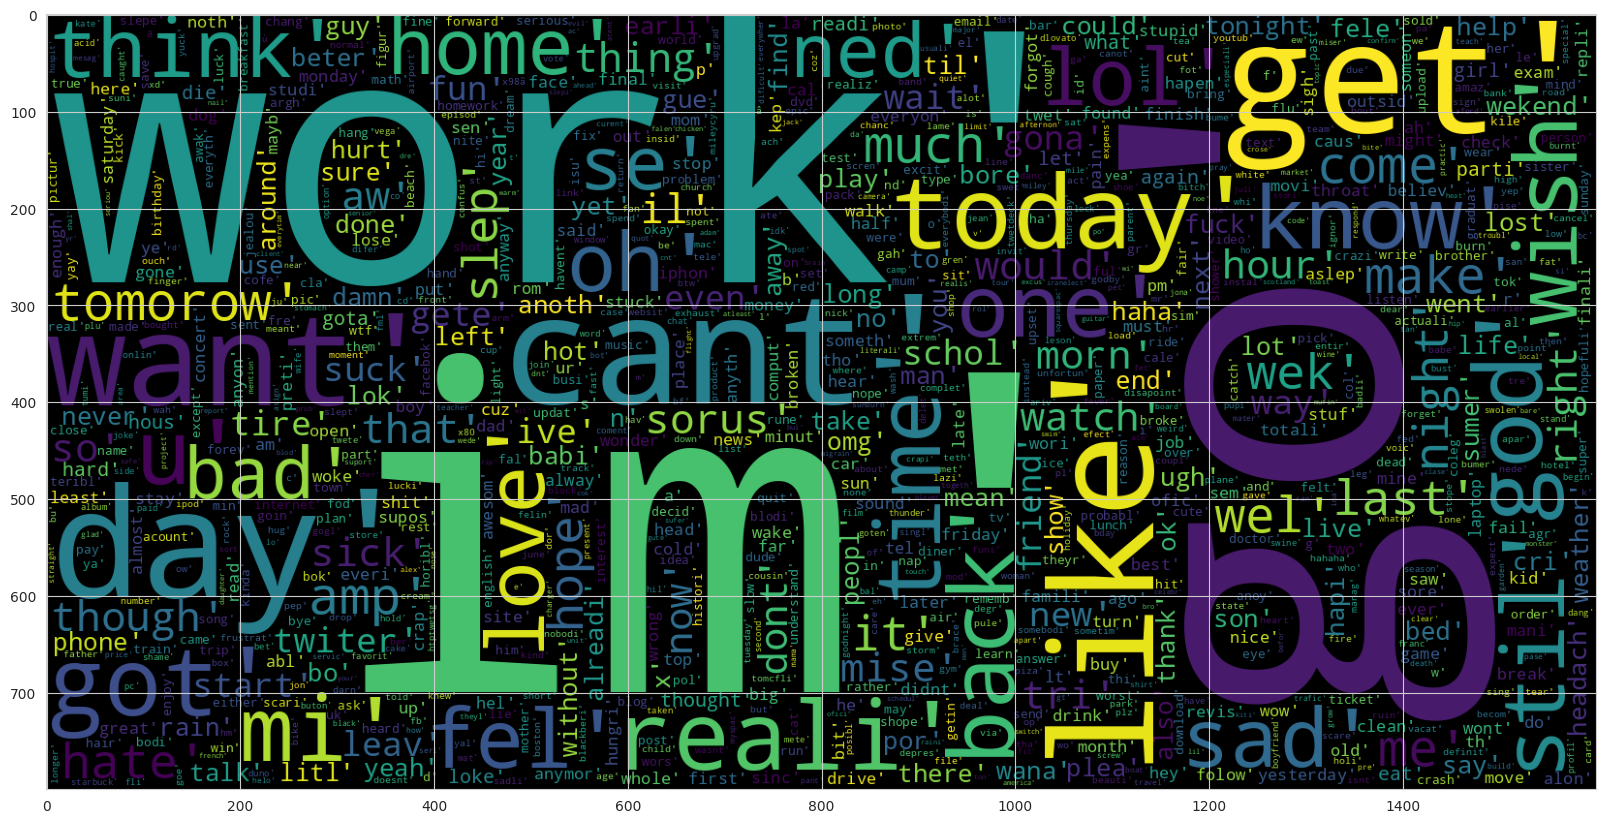

In [43]:
data_neg = data[data['target'] == 0]['text'] # Convert 'text' column to string
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

**Wordcloud fow positive tweets**

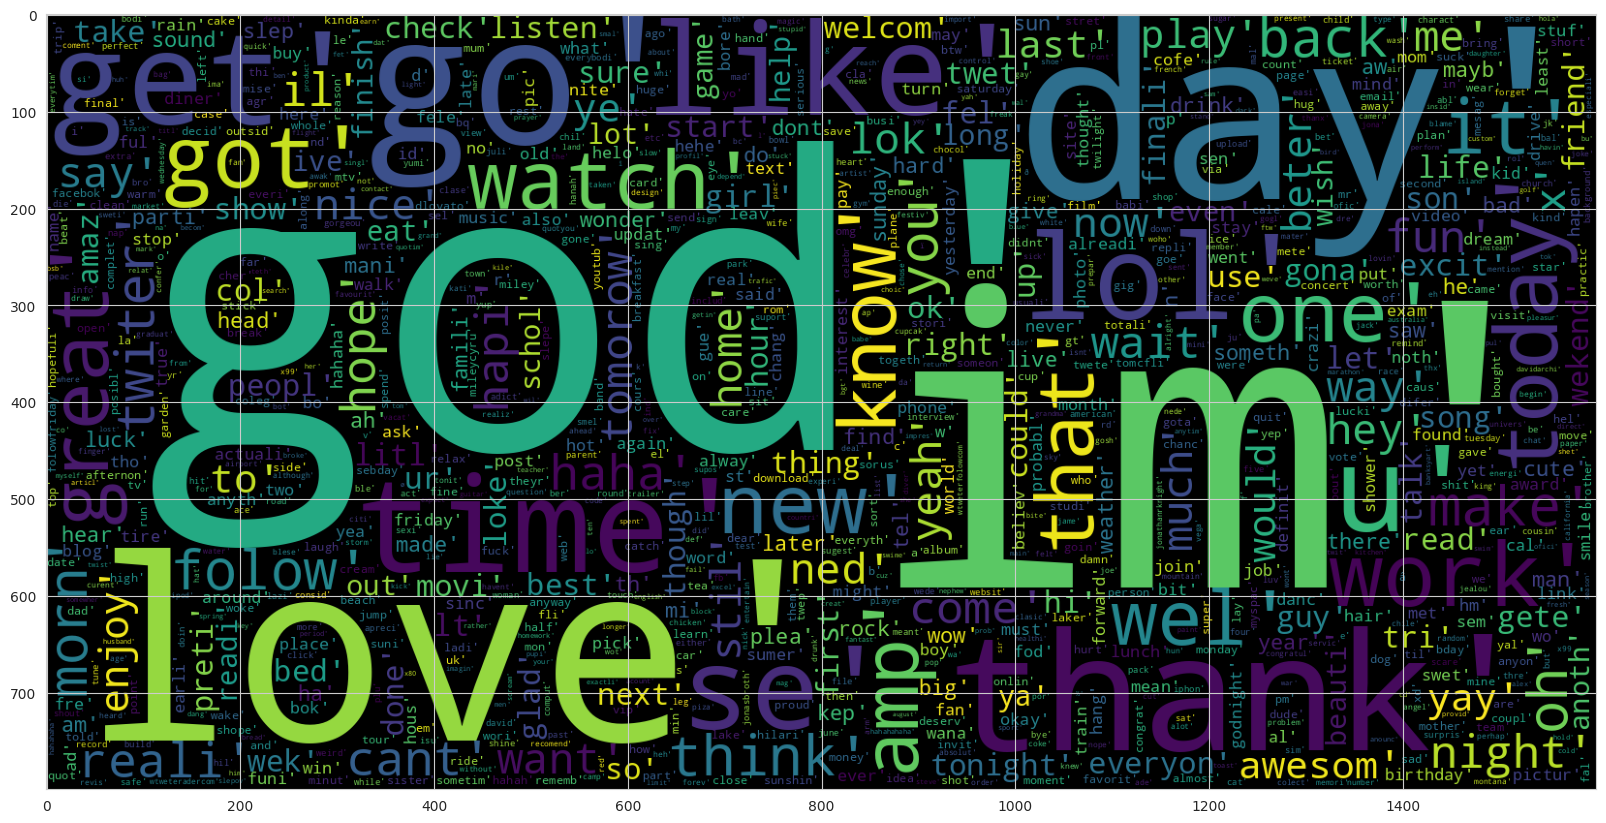

In [44]:
data_pos = data[data['target']==1]['text']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

**Splitting Data**

In [45]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26105111)

**TfidfVectorizer**

The TfidfVectorizer takes a collection of text documents and converts them into a matrix representation, where each row represents a document and each column represents a unique word in the corpus. It calculates the TF-IDF value for each word in each document, which is a measure of how relevant a word is to a document in the context of the entire corpus.

In [46]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectorizer.fit(X_train)
print('No. of feature_words:', len(vectorizer.get_feature_names_out()))

No. of feature_words: 60137


In [47]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

**Evaluation Function**

In [48]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Naive Bayesian**

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1013
           1       0.75      0.69      0.72       987

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



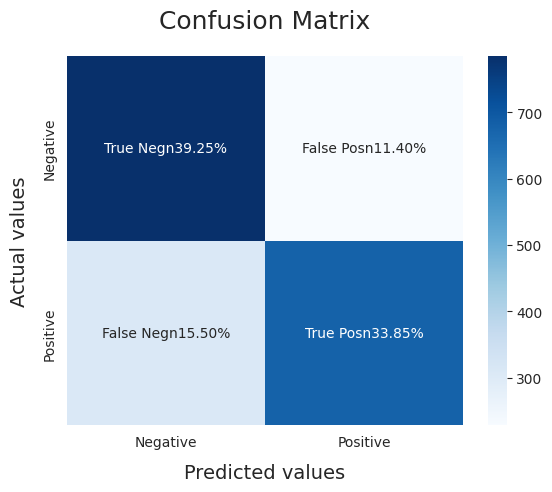

In [49]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

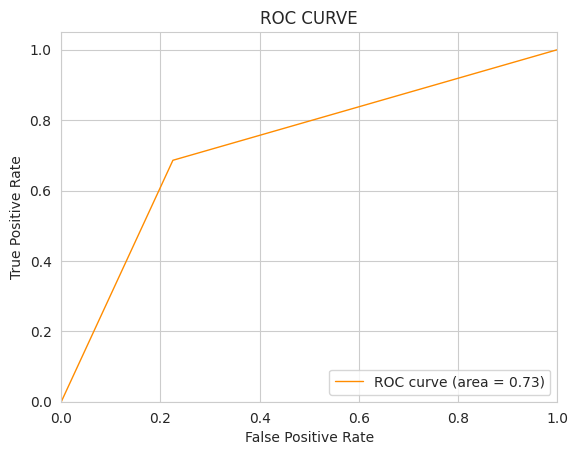

In [50]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Support Vector Machine**

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1013
           1       0.75      0.72      0.73       987

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



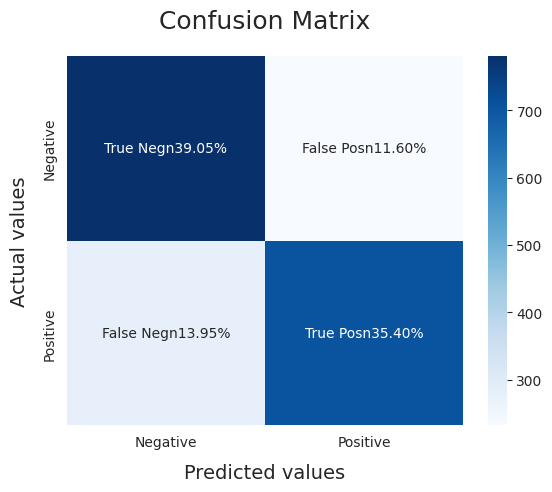

In [51]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

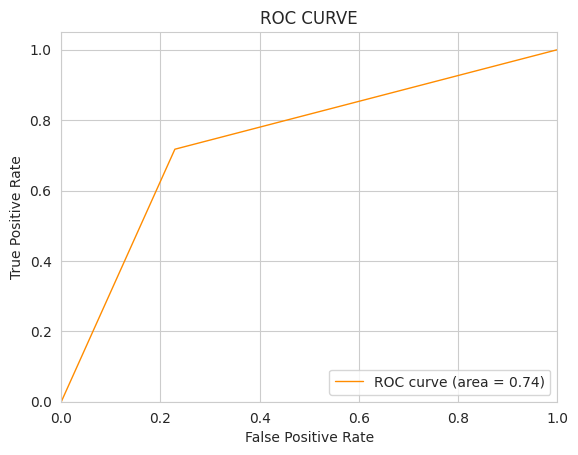

In [52]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Logistic Regression**

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1013
           1       0.74      0.72      0.73       987

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



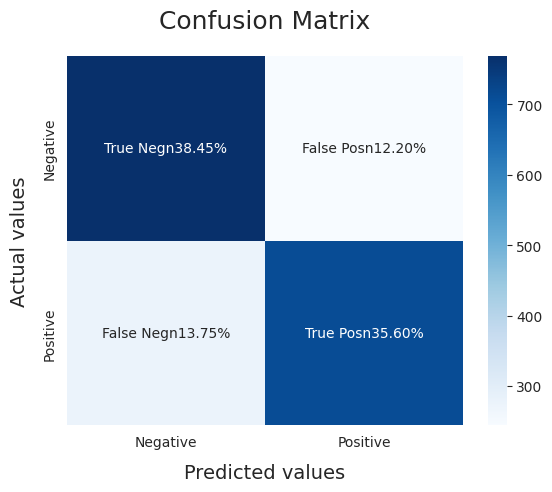

In [53]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

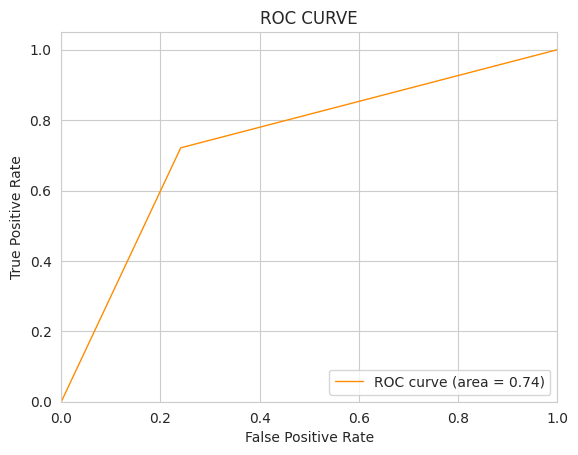

In [54]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**KNN**

              precision    recall  f1-score   support

           0       0.65      0.72      0.69      1013
           1       0.68      0.60      0.64       987

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000



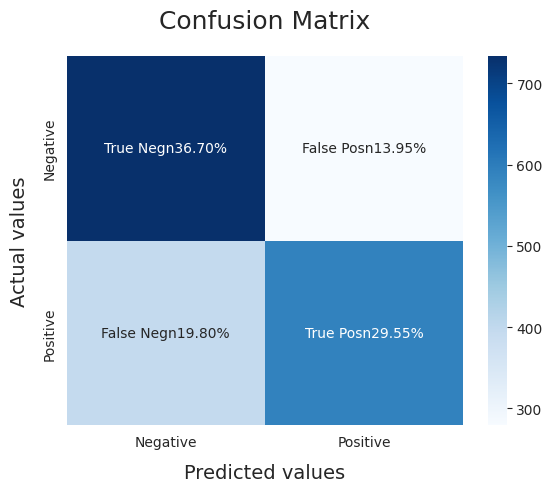

In [55]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
KNNmodel = KNeighborsClassifier(n_neighbors=5)
KNNmodel.fit(X_train, y_train)

# Evaluate the KNN model
model_Evaluate(KNNmodel)

# Make predictions using the KNN model
y_pred4 = KNNmodel.predict(X_test)

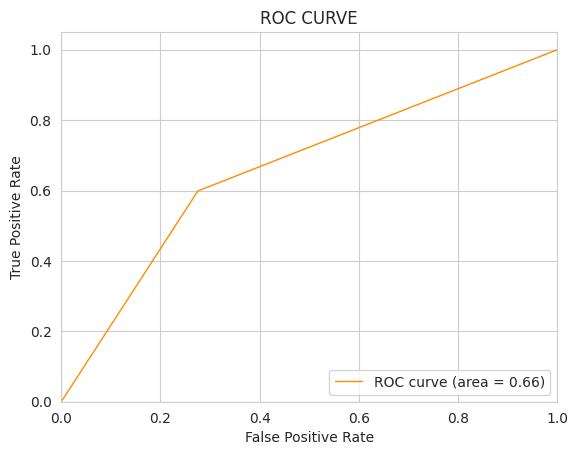

In [56]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [57]:
from sklearn.metrics import accuracy_score
# Calculate accuracy scores for each model
accuracy_svm = accuracy_score(y_test, y_pred1)
accuracy_nb = accuracy_score(y_test, y_pred2)
accuracy_lr = accuracy_score(y_test, y_pred3)
accuracy_knn = accuracy_score(y_test, y_pred4)

# Print the accuracy scores
print("Accuracy SVM:", accuracy_svm)
print("Accuracy Naive Bayes:", accuracy_nb)
print("Accuracy Logistic Regression:", accuracy_lr)
print("Accuracy KNN:", accuracy_knn)

Accuracy SVM: 0.731
Accuracy Naive Bayes: 0.7445
Accuracy Logistic Regression: 0.7405
Accuracy KNN: 0.6625


**LSTM**

In [58]:
import csv
filepath = '/content/gdrive/MyDrive/training.1600000.processed.noemoticon.csv'
column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']

rows = []

with open(filepath, encoding='ISO-8859-1') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        rows.append(row)

df = pd.DataFrame(rows, columns=column_names)
# Shuffle DataFrame rows and reset index
df = df.sample(frac=1).reset_index(drop=True)

In [59]:
df['target'] = df['target'].replace({'4': 1, '0': 0})

In [60]:
# Prepare the data
X = df['text']
y = df['target']

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Tokenize the text data and convert it into sequences
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [63]:
# Pad sequences to ensure uniform length
X_train = pad_sequences(sequences_train, maxlen=max_len)
X_test = pad_sequences(sequences_test, maxlen=max_len)

In [64]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [65]:
# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
10000/10000 [==============================] - 179s 17ms/step - loss: 0.4146 - accuracy: 0.8090 - val_loss: 0.3923 - val_accuracy: 0.8213
Epoch 2/5
10000/10000 [==============================] - 130s 13ms/step - loss: 0.3750 - accuracy: 0.8309 - val_loss: 0.3783 - val_accuracy: 0.8290
Epoch 3/5
10000/10000 [==============================] - 120s 12ms/step - loss: 0.3527 - accuracy: 0.8428 - val_loss: 0.3764 - val_accuracy: 0.8306
Epoch 4/5
10000/10000 [==============================] - 120s 12ms/step - loss: 0.3326 - accuracy: 0.8533 - val_loss: 0.3819 - val_accuracy: 0.8297
Epoch 5/5
10000/10000 [==============================] - 118s 12ms/step - loss: 0.3121 - accuracy: 0.8637 - val_loss: 0.3917 - val_accuracy: 0.8283


In [66]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

10000/10000 [==============================] - 39s 4ms/step
              precision    recall  f1-score   support

           0       0.84      0.81      0.83    160020
           1       0.82      0.84      0.83    159980

    accuracy                           0.83    320000
   macro avg       0.83      0.83      0.83    320000
weighted avg       0.83      0.83      0.83    320000



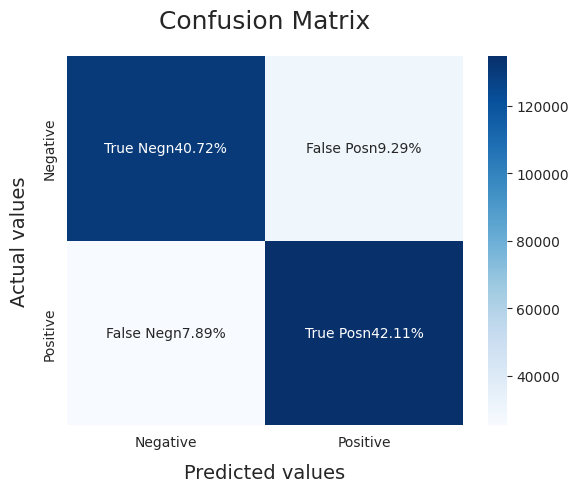

In [67]:
# Evaluate the model using the model_Evaluate function
model_Evaluate(model)

In [68]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

10000/10000 [==============================] - 40s 4ms/step


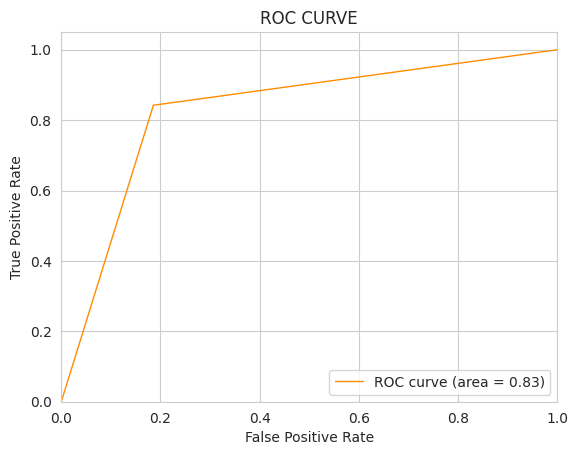

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [70]:
accuracy_lstm = accuracy_score(y_test, y_pred)

**ALL Models Comparison**

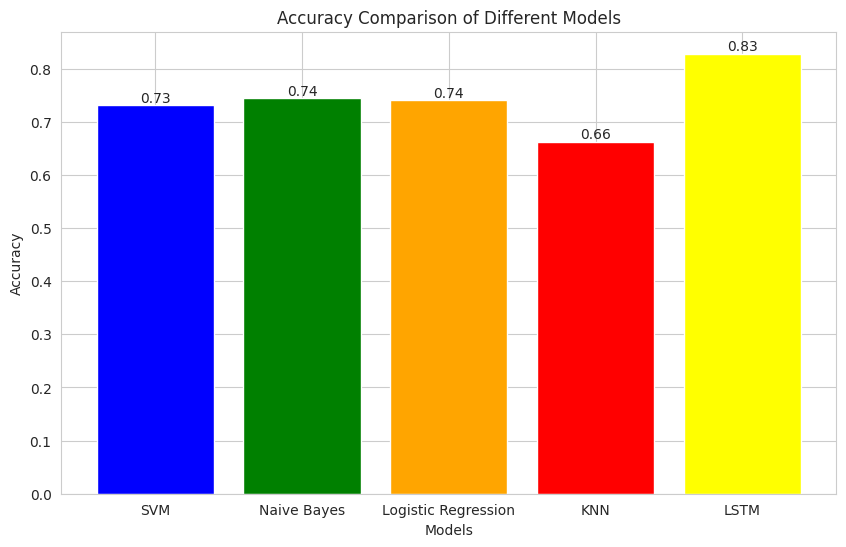

In [72]:
import matplotlib.pyplot as plt

# Accuracy values for each model
accuracies = [accuracy_svm, accuracy_nb, accuracy_lr, accuracy_knn, accuracy_lstm]

# Model names
models = ['SVM', 'Naive Bayes', 'Logistic Regression', 'KNN', 'LSTM']

# Colors for each model
colors = ['blue', 'green', 'orange', 'red', 'yellow']
plt.figure(figsize=(10,6))
# Plotting the bar graph
plt.bar(models, accuracies, color=colors)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')



# Display the accuracy values above the bars
for i in range(len(models)):
    plt.text(i, accuracies[i], str(round(accuracies[i], 2)), ha='center', va='bottom')
    

# Display the bar graph
plt.show()